In [ ]:
!pip install yfinance

In [ ]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [ ]:
#Download Data From NSE
stock_symbol = input('Enter Stock Symbol: ')
#stock_symbol = "RELIANCE" 
yf.pdr_override()
d = pdr.get_data_yahoo(stock_symbol+".NS", period="5y")
#print(d)
d.to_csv('data.csv')
df=pd.read_csv('data.csv')

Enter Stock Symbol: ADANIPOWER
[*********************100%***********************]  1 of 1 completed


Epoch 1/20
11/11 [==============================] - 8s 314ms/step - loss: 0.0132 - val_loss: 0.0390
Epoch 2/20
11/11 [==============================] - 2s 192ms/step - loss: 0.0041 - val_loss: 0.0072
Epoch 3/20
11/11 [==============================] - 2s 195ms/step - loss: 0.0023 - val_loss: 0.0096
Epoch 4/20
11/11 [==============================] - 2s 194ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 5/20
11/11 [==============================] - 2s 195ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 6/20
11/11 [==============================] - 2s 192ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 7/20
11/11 [==============================] - 2s 192ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 8/20
11/11 [==============================] - 2s 193ms/step - loss: 9.8011e-04 - val_loss: 0.0053
Epoch 9/20
11/11 [==============================] - 2s 194ms/step - loss: 9.6640e-04 - val_loss: 0.0051
Epoch 10/20
11/11 [==============================] - 2s 192ms/step - loss: 9.3350e-04 - val_

77.83618187132831

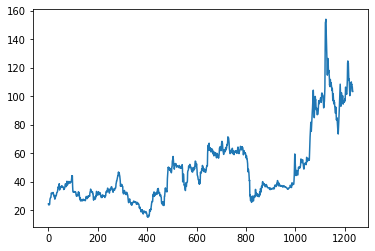

In [ ]:
df1=df.reset_index()['Close']
plt.plot(df1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
### Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
type(lst_output)

list

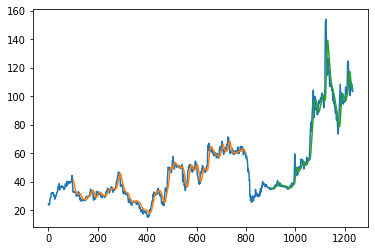

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
type(plt.plot(testPredictPlot))
plt.show()

In [ ]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

[0.6998485]
101
1 day input [0.82103283 0.81930061 0.81298497 0.82579669 0.81107222 0.81641346
 0.82446132 0.81237138 0.81410369 0.81132482 0.81287668 0.80201375
 0.79992055 0.8229817  0.82579669 0.80749932 0.79757474 0.80360174
 0.83258142 0.83276187 0.84246996 0.84149556 0.84369696 0.85192535
 0.84723373 0.86242739 0.87949758 0.87520299 0.87830671 0.87588865
 0.88534413 0.89541303 0.8956296  0.90432708 0.92063945 0.91500956
 0.94189614 0.93597743 0.93561653 0.93980294 0.92688293 0.93749325
 0.93182715 0.91818545 0.91042623 0.91648918 0.89577392 0.90396619
 0.91230286 0.93377603 0.91663359 0.90696162 0.90577065 0.90598723
 0.90183695 0.92009811 0.9134577  0.90555417 0.90306395 0.92515062
 0.9240319  0.94254576 0.95791977 0.9270995  0.90252261 0.90623983
 0.89393333 0.88667942 0.89649571 0.90663685 0.89274245 0.9053376
 0.92904829 0.90530147 0.90111516 0.91847409 0.92320183 0.97834639
 1.         0.98570858 0.95055758 0.9261251  0.91728321 0.91450426
 0.93272939 0.91464867 0.88855605 0

In [ ]:
#plt.plot(day_new,scaler.inverse_transform(df1[1134:]))
#plt.plot(day_pred,scaler.inverse_transform(lst_output))

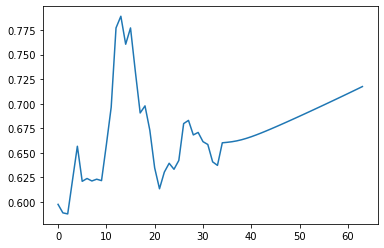

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

list

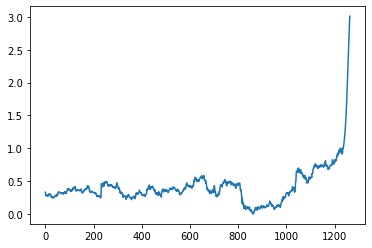

In [ ]:
#df3=scaler.inverse_transform(df3).tolist()
type(plt.plot(df3))